In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo


In [25]:
def f(X):
    Y = (X-1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X,Y))
    return Y

In [26]:
Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP',options={'disp':True})
print("Minima found at : ")
print("X = {}, Y = {}".format(min_result.x,min_result.fun))

X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at : 
X = [ 1.5], Y = [ 0.5]


X = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


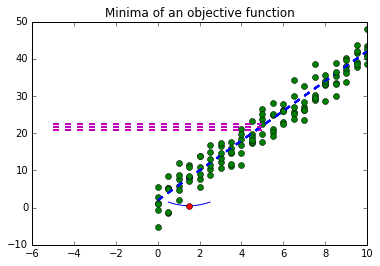

In [27]:
Xplot = np.linspace(0.5,2.5,21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x,min_result.fun,'ro')
plt.title("Minima of an objective function")
plt.show()

In [41]:
def fit_line(data, error_func):
    """
    fit a line to given data, using given error function
    
    data: 2D array with row having point info
    error_func : function that computes error between a line and observer data
    
    returns line that minimizes the error function
    """
    #generate initial guess for line model
    l = np.float32([0,np.mean(data[:,1])])
    
    #plot initial guess
    x_ends = np.float32([-5,5])
    plt.plot(x_ends,(l[0])*(x_ends)+l[1],'m--',linewidth=2.0, label='Initial Guess')
    
    result = spo.minimize(error_func, l,args=(data,),method='SLSQP',options={'disp':True})
    return result.x

def error(line,data):
    err = np.sum((data[:,1]-((line[0]) * (data[:,0]) + line[1])) ** 2)
    return err

Original line : C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 174.654166695
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
fitted line : C0 = 3.953314734316417, C1 = 2.2084113803722567


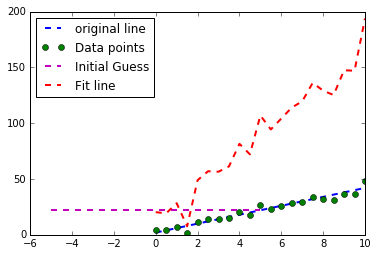

In [43]:
l_orig = np.float32([4,2])
print("Original line : C0 = {}, C1 = {}".format(l_orig[0],l_orig[1]))
Xorig = np.linspace(0,10,21)
Yorig = l_orig[0]*Xorig + l_orig[1]
plt.plot(Xorig, Yorig,'b--',linewidth=2.0,label="original line")

# Generate noisy data
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig+noise]).T
plt.plot(data[:,0],data[:,1],'go',label='Data points')

# try to fit line to this data
l_fit = fit_line(data, error)
print("fitted line : C0 = {}, C1 = {}".format(l_fit[0],l_fit[1]))
plt.plot(data[:,0],l_fit[0]*data[:,1]+l_fit[1],'r--',linewidth=2.0, label='Fit line')

plt.legend(loc="upper left")
plt.show()
